In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/FinancialMarketData.csv')

In [3]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float6

In [5]:
df = df.dropna()

In [6]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


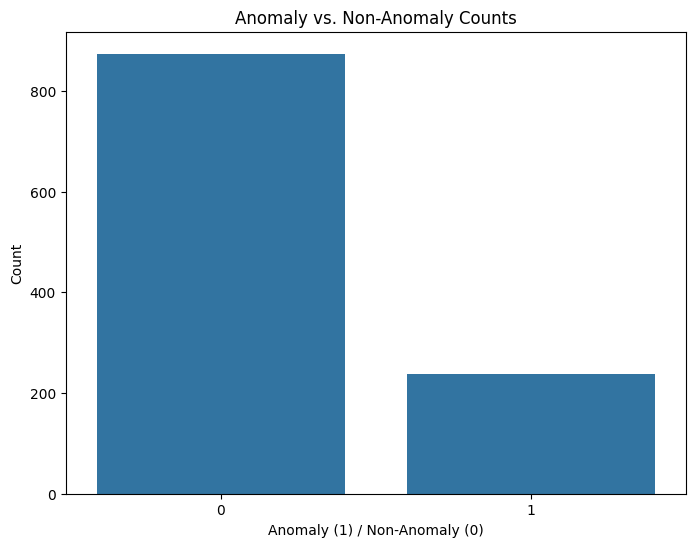

In [7]:
anomaly_counts = df['Y'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values)
plt.title('Anomaly vs. Non-Anomaly Counts')
plt.xlabel('Anomaly (1) / Non-Anomaly (0)')
plt.ylabel('Count')
plt.show()

**Correlation analysis**

In [8]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,...,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,...,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,...,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,...,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,...,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,...,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,...,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,...,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,...,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.861036,0.759998,0.284056,0.430908
VIX,0.598432,-0.075873,-0.094127,-0.045367,-0.190060,0.115712,-0.134791,-0.124496,-0.213999,1.000000,...,-0.310635,-0.253247,-0.227376,-0.239029,-0.421996,-0.367709,-0.098962,-0.247953,-0.243126,-0.164591


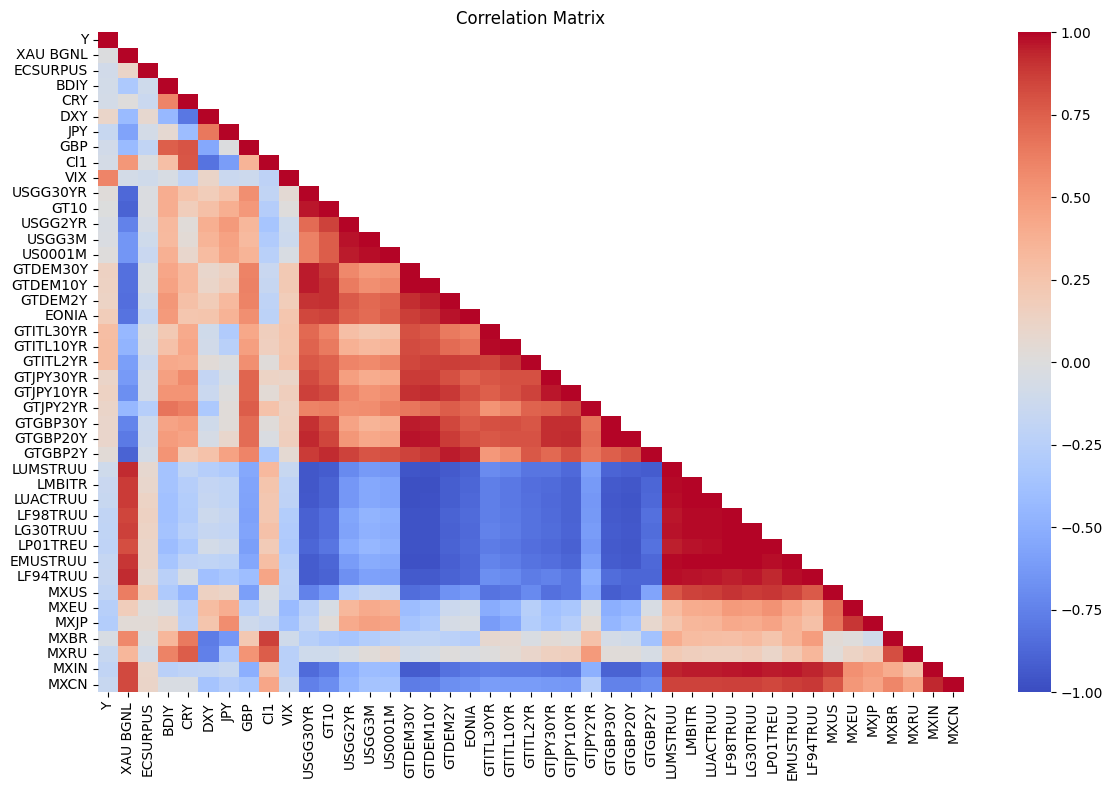

In [9]:
corr_matrix = numeric_columns.corr()
upper_triangle = np.triu(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix), k=1)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


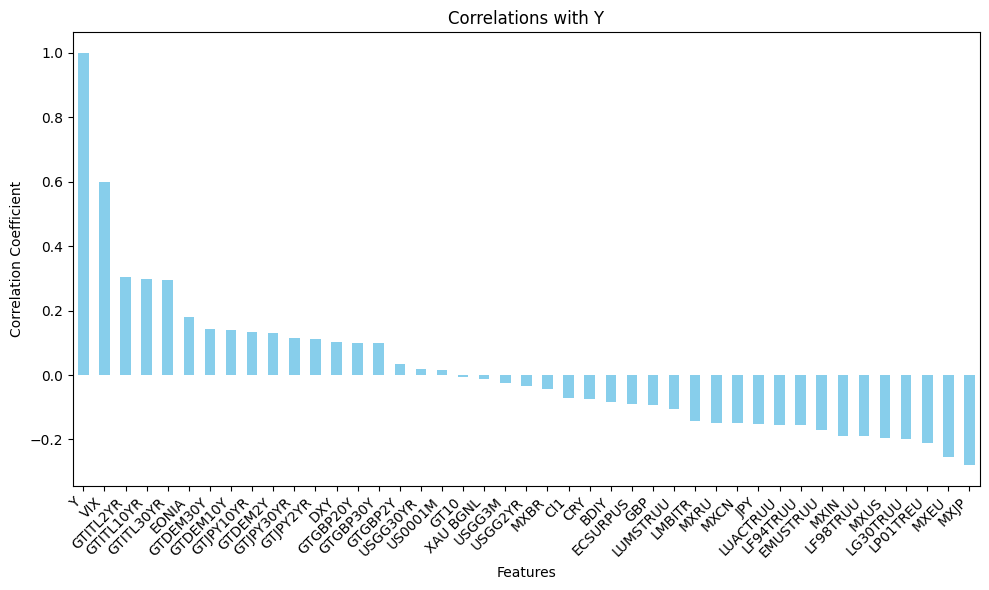

In [10]:
correlations = numeric_columns.corr()['Y'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlations with Y')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
cols_to_plot = ['VIX', 'GTITL2YR', 'JPY' , 'MXJP' ]

<Figure size 2000x600 with 0 Axes>

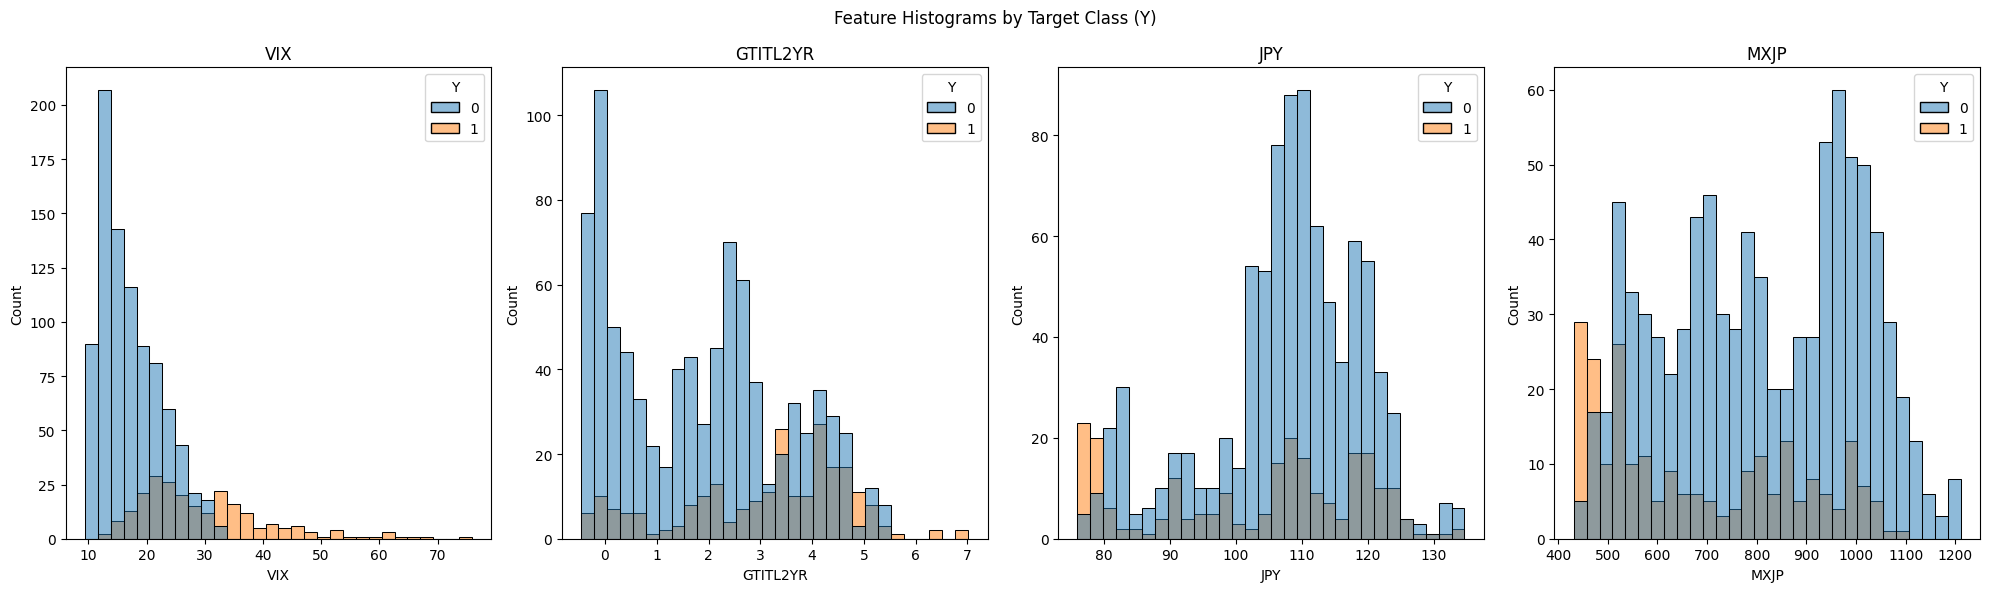

In [12]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Histograms by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
    sns.histplot(
        data=df,
        x=col,
        hue='Y',
        ax=axes[i],
        multiple="layer",
        alpha=0.5,
        bins=30
    )
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


<Figure size 2000x600 with 0 Axes>

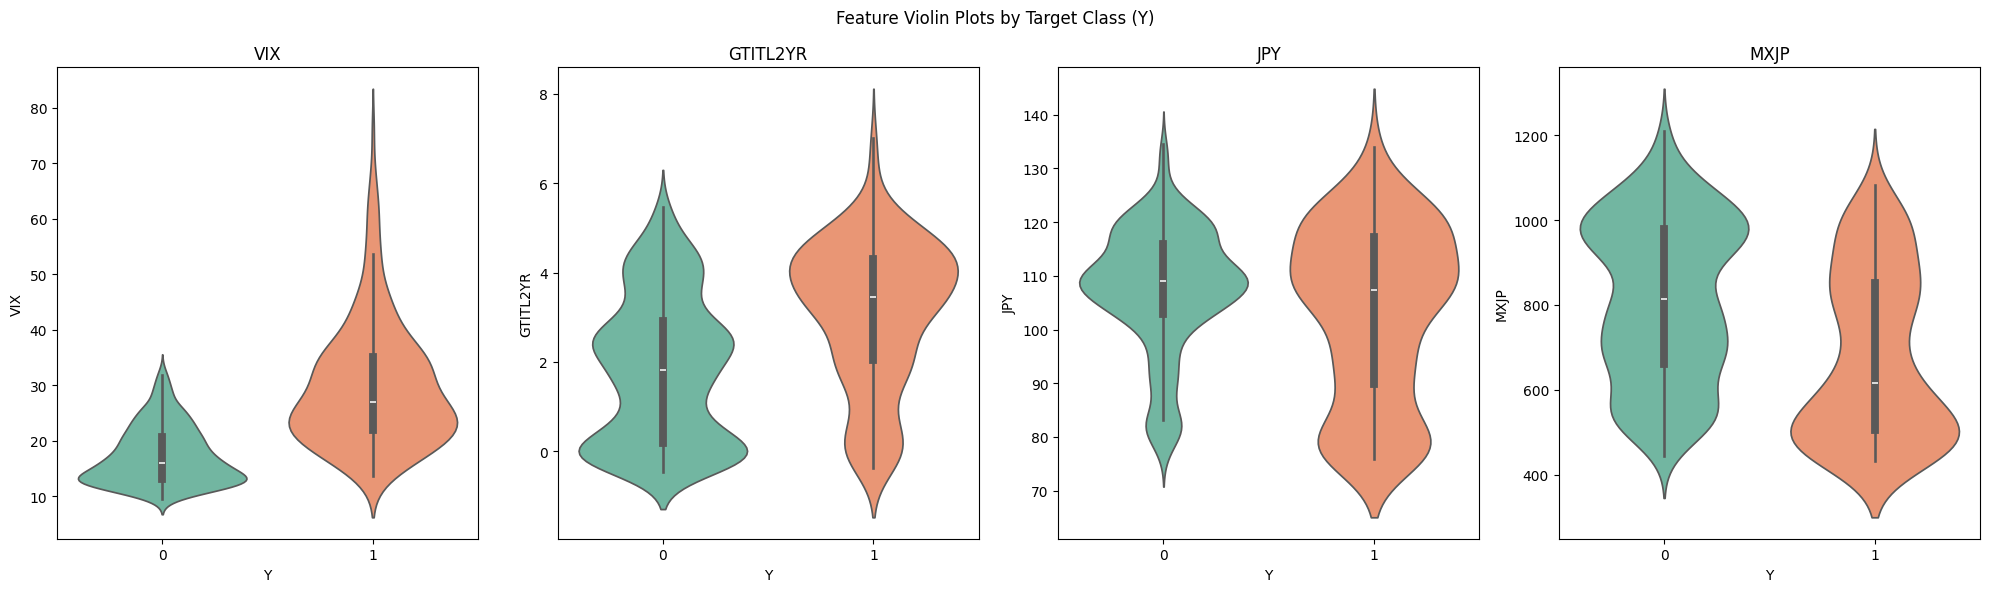

In [13]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Violin Plots by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
    sns.violinplot(
        data=df,
        x='Y',
        y=col,
        ax=axes[i],
        palette="Set2",
        scale="width"
    )
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [14]:
X = df[['VIX', 'GTITL2YR', 'JPY' , 'MXJP']  ]
y = df['Y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(random_state=42, max_iter=1200, C=0.4, class_weight="balanced", solver="lbfgs")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients:")
print(f"VIX coeff: {model.coef_[0][0]:.4f}")
print(f"GTITL2YR coeff: {model.coef_[0][1]:.4f}")
print(f"JPY coeff: {model.coef_[0][2]:.4f}")
print(f"MXJP coeff: {model.coef_[0][3]:.4f}")

Confusion Matrix:
[[137  40]
 [  9  37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       177
           1       0.48      0.80      0.60        46

    accuracy                           0.78       223
   macro avg       0.71      0.79      0.72       223
weighted avg       0.84      0.78      0.80       223


Model Coefficients:
VIX coeff: 1.9249
GTITL2YR coeff: 0.6284
JPY coeff: -0.3525
MXJP coeff: 0.0673


In [15]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Random Forest Classifier Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

feature_importances = rf_classifier.feature_importances_
feature_names = ['VIX', 'GTITL2YR', 'JPY', 'MXJP']

for i, importance in enumerate(feature_importances):
    print(f"Feature {feature_names[i]}: {importance:.4f}")

Random Forest Classifier Results:
Confusion Matrix:
[[168   9]
 [ 18  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       177
           1       0.76      0.61      0.67        46

    accuracy                           0.88       223
   macro avg       0.83      0.78      0.80       223
weighted avg       0.87      0.88      0.87       223

Accuracy Score: 0.8789237668161435
Feature VIX: 0.4533
Feature GTITL2YR: 0.1984
Feature JPY: 0.1705
Feature MXJP: 0.1778


In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np

X = df[['VIX', 'GTITL2YR', 'JPY', 'MXJP']]

iso_forest = IsolationForest(
    n_estimators=1000,  # Number of trees
    contamination=0.20,  # Expected proportion of outliers
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    warm_start=True
)

# Fit and predict
# predict() returns 1 for inliers, -1 for outliers
predictions = iso_forest.fit_predict(X)

# Convert predictions to binary format (0 for normal, 1 for outliers)
# This makes it consistent with your original labels
y_pred = np.where(predictions == -1, 1, 0)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred))

# Calculate and print anomaly scores
anomaly_scores = iso_forest.score_samples(X)
print("\nAnomaly Score Statistics:")
print(f"Mean score: {np.mean(anomaly_scores):.4f}")
print(f"Min score: {np.min(anomaly_scores):.4f}")
print(f"Max score: {np.max(anomaly_scores):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       874
           1       0.57      0.53      0.55       237

    accuracy                           0.81      1111
   macro avg       0.72      0.71      0.72      1111
weighted avg       0.81      0.81      0.81      1111


Anomaly Score Statistics:
Mean score: -0.4758
Min score: -0.6650
Max score: -0.4104


In [17]:
y_true = np.array(df['Y'])
selected_features = pd.DataFrame(df, columns=['VIX', 'GTITL2YR', 'JPY', 'MXJP'])
isoforest_features = selected_features.copy()
isoforest_features['Anomaly'] = y_true
isoforest_features['Anomaly_scaled'] = y_pred

Decision Tree Classifier Results:
Confusion Matrix:
[[175   2]
 [ 26  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       177
           1       0.91      0.43      0.59        46

    accuracy                           0.87       223
   macro avg       0.89      0.71      0.76       223
weighted avg       0.88      0.87      0.86       223

Accuracy Score: 0.8744


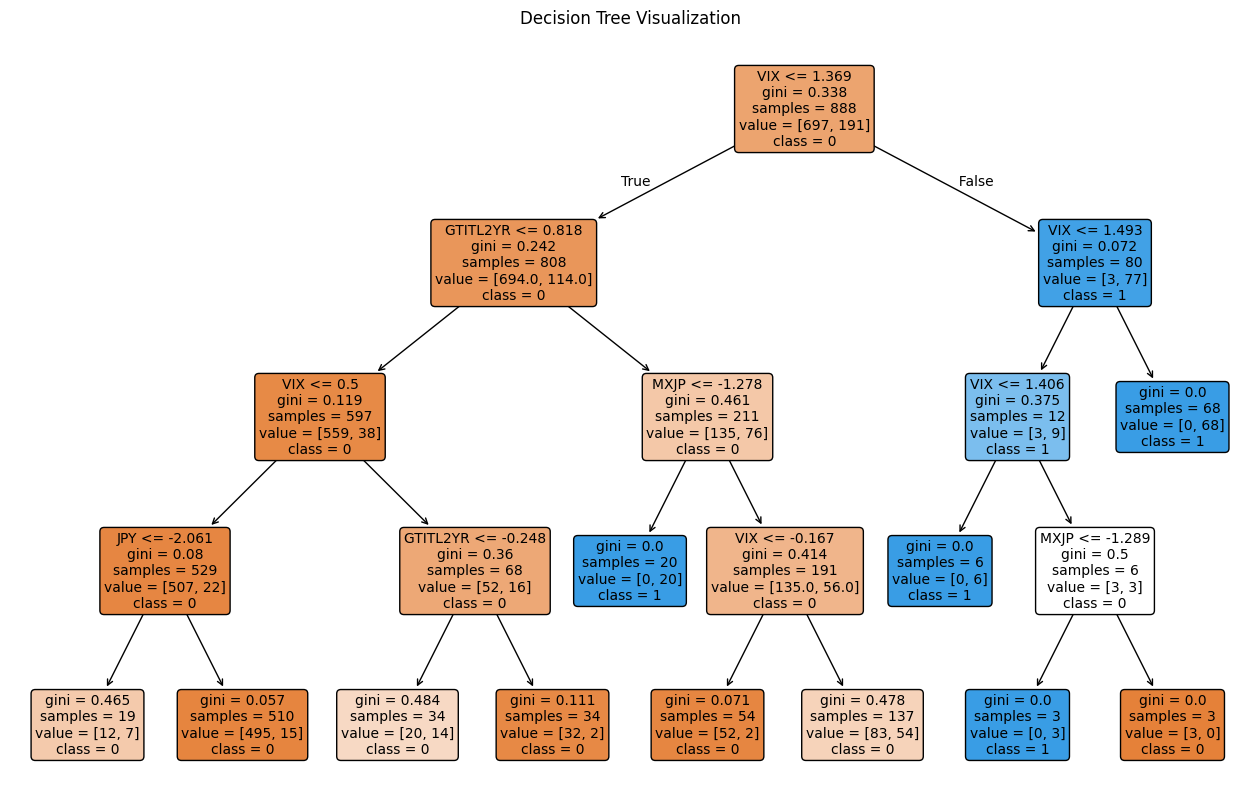

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')


In [18]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Print Decision Tree Classifier Results
print("Decision Tree Classifier Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# Update feature names to match those used in the model
plt.figure(figsize=(16, 10))
plot_tree(
    dt_classifier,
    feature_names=['VIX', 'GTITL2YR', 'JPY', 'MXJP'],  # Use correct feature names
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Check column names used in the original DataFrame
print(df.columns)  # To confirm the feature columns used for training


In [19]:
def create_financial_time_split(df, train_years=4, validation_weeks=52, test_weeks=52):
    """
    Specialized split for financial time series

    Args:
        df: DataFrame with weekly data
        train_years: Number of years for training (default 3 years)
        validation_weeks: Weeks for validation (default 26 weeks = 6 months)
        test_weeks: Weeks for testing (default 26 weeks = 6 months)
    """
    # Convert date column to datetime if not already
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.sort_values('Data')

    # Calculate sizes
    train_size = train_years * 52  # 52 weeks per year
    total_required_size = train_size + validation_weeks + test_weeks

    if len(df) < total_required_size:
        raise ValueError("Not enough data for specified split sizes")

    train_end = train_size
    val_end = train_end + validation_weeks

    train_data = df.iloc[:train_end]
    validation_data = df.iloc[train_end:val_end]
    test_data = df.iloc[val_end:val_end + test_weeks]

    # Verify splits
    print(f"Training period: {train_data['Data'].min()} to {train_data['Data'].max()}")
    print(f"Validation period: {validation_data['Data'].min()} to {validation_data['Data'].max()}")
    print(f"Testing period: {test_data['Data'].min()} to {test_data['Data'].max()}")

    return train_data, validation_data, test_data

In [20]:
train_data, validation_data, test_data = create_financial_time_split(df)

Training period: 2000-01-11 00:00:00 to 2003-12-30 00:00:00
Validation period: 2004-01-06 00:00:00 to 2004-12-28 00:00:00
Testing period: 2005-01-04 00:00:00 to 2005-12-27 00:00:00


In [21]:
from openai import OpenAI
import os
from google.colab import userdata


In [22]:
groq_api = userdata.get('GROQ_API_KEY')
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=groq_api
)

In [23]:
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,2000-01-11,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,2000-01-18,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,2000-01-25,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2000-02-01,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2000-02-08,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,2021-03-23,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,2021-03-30,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,2021-04-06,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,2021-04-13,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [24]:
query_data = df.head(5)
system_prompt = '''You are an expert financial analyst with machine learning background. You also have knowledge of how to detect anomalies in financial data.
You will explain all column headers and their influence over the financial market.
Explain their contributions to market anomalies.
Out of all columns headers, explain which are the key columns required to train an ML model that can detect market anomalies.
Explain if any columns need to be dropped in order to create an accurate model.
'''
user_query = f"This is the data: {query_data}. variable Y in the dataframe is a binary indicator of a market anomaly or not."

In [25]:
llm_response = client.chat.completions.create(
       model="llama-3.1-8b-instant",
       messages=[
           {"role": "system", "content": system_prompt},
           {"role": "user", "content": user_query}
       ]
   )

print(llm_response.choices[0].message.content)

The provided dataset appears to be a collection of financial market indicators and their influence on the market. Let's break down each column and explain their relevance to detecting market anomalies:

**Date (2000-01-11, 2000-01-18, etc.)**: This is not a numerical variable, but rather a timestamp indicating the date. While not directly influential on market anomalies, it can be useful for temporal analysis.

**Market indicators (XAU, BGNL, ECSURPUS, BDIY, CRY, DXY, JPY, GBP, etc.)**: These columns represent various financial market indicators, including:
- XAU: Gold price
- BGNL, ECSURPUS: Gold and silver stocks
- BDIY: Copper price
- CRY: Crude oil price
- DXY: US dollar index
- JPY: Japanese yen exchange rate
- GBP: British pound exchange rate
- MXUS, MXEU, MXJP, MXBR, MXRU, MXIN, MXCN: Exchange rates vs. the US dollar for various markets

These indicators can be related to market anomalies as they may exhibit unusual patterns or correlations that precede anomalies.

**Cl1 (25.77,

In [26]:



df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Y          1111 non-null   int64         
 1   Data       1111 non-null   datetime64[ns]
 2   XAU BGNL   1111 non-null   float64       
 3   ECSURPUS   1111 non-null   float64       
 4   BDIY       1111 non-null   float64       
 5   CRY        1111 non-null   float64       
 6   DXY        1111 non-null   float64       
 7   JPY        1111 non-null   float64       
 8   GBP        1111 non-null   float64       
 9   Cl1        1111 non-null   float64       
 10  VIX        1111 non-null   float64       
 11  USGG30YR   1111 non-null   float64       
 12  GT10       1111 non-null   float64       
 13  USGG2YR    1111 non-null   float64       
 14  USGG3M     1111 non-null   float64       
 15  US0001M    1111 non-null   float64       
 16  GTDEM30Y   1111 non-null   float64       


In [27]:
df.dropna(inplace=True)

In [28]:
df['Month'] = df['Data'].dt.month

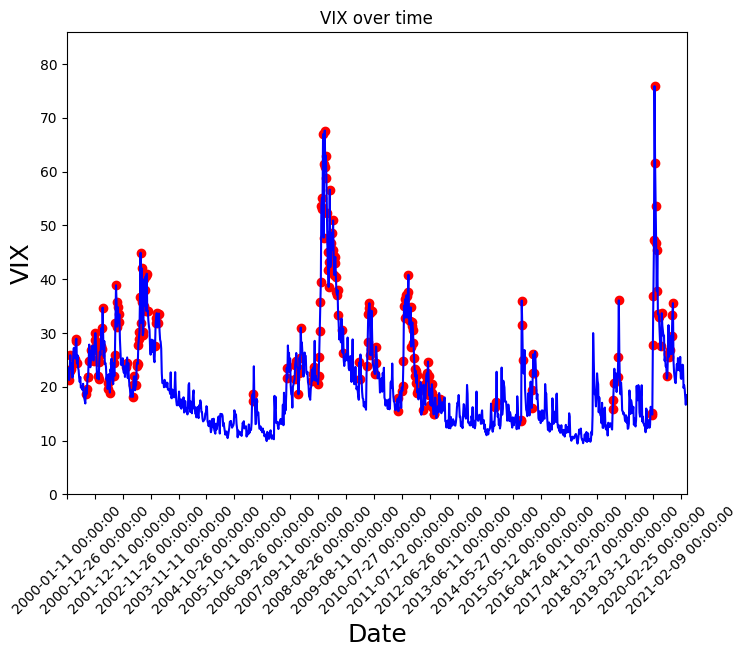

In [29]:
plt.figure(figsize=(8,6))
plt.xlim(0, df.shape[0])
plt.ylim(0, df['VIX'].max() + 10)
plt.plot(df['VIX'], color='blue', label='VIX')
plt.scatter(df[df['Y'] == 1].index, df[df['Y'] == 1]['VIX'], color='red', label='Anomaly')
plt.title('VIX over time')
plt.xticks(range(0, df.shape[0], 50), df['Data'].iloc[::50], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('VIX', fontsize = 18)
plt.show()

In [30]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import shap
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)

In [33]:
X_train_scaled.shape

(888, 4)

In [34]:
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)

In [35]:
with open('pca.pkl', 'wb') as file:
  pickle.dump(pca, file)

In [36]:
pca.explained_variance_ratio_

array([0.45769864, 0.26667801, 0.18162512])

In [37]:
selected_columns = X_train_scaled
X_train_pca = np.hstack((X_train_pca, selected_columns))

In [38]:
X_train_pca.shape

(888, 7)

In [39]:
X_test_pca = pca.transform(X_test_scaled)

In [40]:
selected_columns_test = X_test_scaled

In [41]:
X_test_pca = np.hstack((X_test_pca, selected_columns_test))


In [42]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, model_filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("-------------")
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report: \n{classification_report(y_test, y_pred)}")
  print("-------------")

  #use pickle to save the model
  with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

  print(f"Model saved as {model_filename}")

In [43]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_pca, y_train)
y_pred = lr_model.predict(X_test_pca)

**Logistic Regression With PCA**

In [44]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_pca, y_train)
y_pred = lr_model.predict(X_test_pca)

In [45]:
evaluate_and_save_model(lr_model, X_train_pca, X_test_pca, y_train, y_test, 'lr_model.pkl')

-------------
LogisticRegression Accuracy: 0.8879

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       177
           1       0.82      0.59      0.68        46

    accuracy                           0.89       223
   macro avg       0.86      0.78      0.81       223
weighted avg       0.88      0.89      0.88       223

-------------
Model saved as lr_model.pkl


**Isolation Forest Predicted Anomolies**

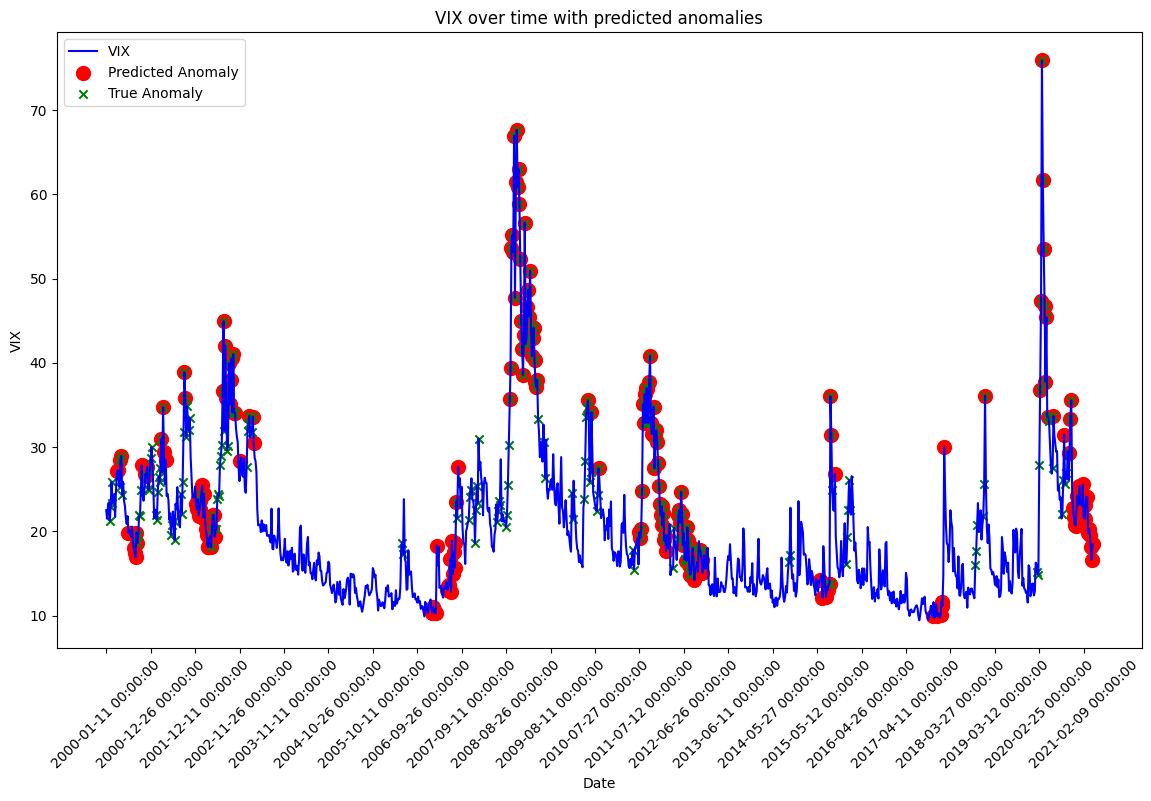

In [46]:
plt.figure(figsize=(14,8))
plt.plot(isoforest_features['VIX'], label='VIX', color='blue')
plt.title(f"VIX over time with predicted anomalies")

plt.scatter(
    isoforest_features[isoforest_features['Anomaly_scaled'] == 1].index,  # X-axis is the index of the anomalies
    isoforest_features[isoforest_features['Anomaly_scaled'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='red',
    label='Predicted Anomaly',
    s = 100
)
plt.scatter(
    df[df['Y'] == 1].index,  # X-axis is the index of the anomalies
    df[df['Y'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='green',
    label='True Anomaly',
    marker = 'x',
)

plt.xticks(range(0, df.shape[0], 50), df['Data'].iloc[::50], rotation=45)
plt.xlabel("Date", fontsize=10)
plt.ylabel('VIX', fontsize=10)
plt.legend()
plt.show()

ExactExplainer explainer: 1112it [04:45,  3.81it/s]


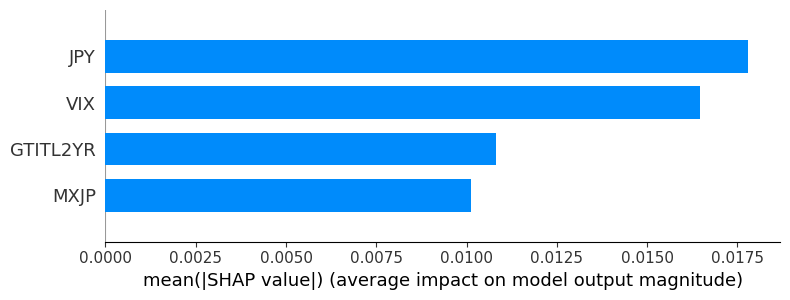

In [47]:
# SHAP explainer for the Isolation Forest
explainer = shap.Explainer(iso_forest.decision_function, selected_features)
shap_values = explainer(selected_features)

# Visualize feature importance
shap.summary_plot(shap_values,selected_features, plot_type="bar")

In [48]:
shap_values

.values =
array([[ 0.01343913, -0.01597787,  0.00896291, -0.00353174],
       [ 0.0149428 , -0.01817191,  0.00697241, -0.0034594 ],
       [ 0.01246293, -0.0156113 ,  0.00985839, -0.00082606],
       ...,
       [ 0.01024191, -0.01899657,  0.01470501, -0.08346237],
       [ 0.01197132, -0.01881088,  0.01492648, -0.08352917],
       [ 0.01068672, -0.01687387,  0.0148532 , -0.08421857]])

.base_values =
array([0.0310718, 0.0310718, 0.0310718, ..., 0.0310718, 0.0310718,
       0.0310718])

.data =
array([[ 2.25000e+01,  4.49500e+00,  1.05860e+02,  9.90590e+02],
       [ 2.15000e+01,  4.53500e+00,  1.05470e+02,  9.93980e+02],
       [ 2.30200e+01,  4.51100e+00,  1.06040e+02,  9.74830e+02],
       ...,
       [ 1.81200e+01, -3.77000e-01,  1.09880e+02,  1.19462e+03],
       [ 1.66500e+01, -3.63000e-01,  1.09190e+02,  1.19706e+03],
       [ 1.84600e+01, -3.52000e-01,  1.08090e+02,  1.19616e+03]])

**XG Boost**

In [49]:
param_grid = {'learning_rate': [0.01, 0.1, 0.5, 0.9],
              'n_estimators': [100, 200, 300],
              'subsample': [0.3, 0.5, 0.9]}
xgb_model = xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 100, subsample = 0.3)
xgb_tuned = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)

In [50]:
evaluate_and_save_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, 'xgb_model.pkl')


-------------
XGBClassifier Accuracy: 0.8789

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       177
           1       0.91      0.46      0.61        46

    accuracy                           0.88       223
   macro avg       0.89      0.72      0.77       223
weighted avg       0.88      0.88      0.86       223

-------------
Model saved as xgb_model.pkl


In [51]:
evaluate_and_save_model(xgb_model, X_train_pca, X_test_pca, y_train, y_test, 'xgb_model_pca.pkl')

-------------
XGBClassifier Accuracy: 0.8744

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       177
           1       0.91      0.43      0.59        46

    accuracy                           0.87       223
   macro avg       0.89      0.71      0.76       223
weighted avg       0.88      0.87      0.86       223

-------------
Model saved as xgb_model_pca.pkl


In [52]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42, shuffle = False)

In [53]:
print(X_train.shape)  # Dimensions of training data
print(xgb_model.feature_importances_)

(888, 4)
[0.17267145 0.05870266 0.06301526 0.4296008  0.11551475 0.0835442
 0.07695087]



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       177
           1       0.48      0.80      0.60        46

    accuracy                           0.78       223
   macro avg       0.71      0.79      0.72       223
weighted avg       0.84      0.78      0.80       223


Random Forest Results:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       177
           1       0.76      0.61      0.67        46

    accuracy                           0.88       223
   macro avg       0.83      0.78      0.80       223
weighted avg       0.87      0.88      0.87       223


Isolation Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       177
           1       0.59      0.50      0.54        46

    accuracy                           0.83       223
   macro avg       0.73      0.70      0.72    

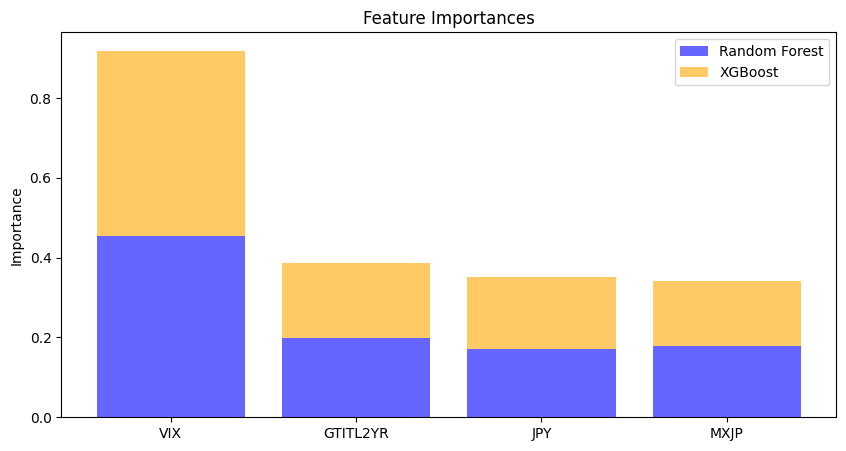

In [54]:
# Select the required features and target variable
selected_features = ['VIX', 'GTITL2YR', 'JPY', 'MXJP']
X = df[selected_features]
y = df['Y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, class_weight="balanced")
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))

# Isolation Forest
iso_forest = IsolationForest(contamination=0.2, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)  # Convert -1 to 1 (anomalies), 1 to 0
print("\nIsolation Forest Results:")
print(classification_report(y_test, y_pred_iso))

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

# Feature Importance Visualization for Random Forest and XGBoost
feature_importances_rf = rf_model.feature_importances_
feature_importances_xgb = xgb_model.feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(selected_features, feature_importances_rf, color='blue', alpha=0.6, label='Random Forest')
plt.bar(selected_features, feature_importances_xgb, color='orange', alpha=0.6, label='XGBoost', bottom=feature_importances_rf)
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.legend()
plt.show()

**SMOTE to balence the dataset and improve performance**

In [55]:
smote = SMOTE(random_state = 0)
X_resampled, y_resampled = smote.fit_resample(X_train_pca, y_train)

In [56]:
evaluate_and_save_model(xgb_model, X_resampled, X_test_pca, y_resampled, y_test, 'xgb_model_smote.pkl')


-------------
XGBClassifier Accuracy: 0.8475

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       177
           1       0.61      0.72      0.66        46

    accuracy                           0.85       223
   macro avg       0.77      0.80      0.78       223
weighted avg       0.86      0.85      0.85       223

-------------
Model saved as xgb_model_smote.pkl


In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [58]:
svm_model = SVC(random_state = 42, kernel = 'rbf')
evaluate_and_save_model(svm_model, X_resampled, X_test_pca, y_resampled, y_test, 'svm_model.pkl')

-------------
SVC Accuracy: 0.8117

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       177
           1       0.53      0.80      0.64        46

    accuracy                           0.81       223
   macro avg       0.73      0.81      0.76       223
weighted avg       0.86      0.81      0.82       223

-------------
Model saved as svm_model.pkl


**With SMOTE it actually increased the recall score a lot**

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from openai import OpenAI
import warnings
warnings.filterwarnings('ignore')

class MarketAnomalyStrategy:
    def __init__(self, lookback_period=30):
        self.lookback_period = lookback_period
        self.positions = []
        self.returns = []

        # Load the saved models and transformers
        try:
            with open('xgb_model_smote.pkl', 'rb') as file:
                self.model = pickle.load(file)
            with open('scaler.pkl', 'rb') as file:
                self.scaler = pickle.load(file)
            with open('pca.pkl', 'rb') as file:
                self.pca = pickle.load(file)
        except FileNotFoundError as e:
            raise Exception(f"Required model files not found: {str(e)}")

    def generate_signals(self, data):
        """Generate trading signals based on anomaly predictions"""
        # Ensure data has required features
        required_features = ['VIX', 'GTITL2YR', 'JPY', 'MXJP']
        if not all(feature in data.columns for feature in required_features):
            raise ValueError(f"Data must contain all required features: {required_features}")

        # Prepare features
        features = data[required_features]

        # Scale the features
        scaled_features = self.scaler.transform(features)

        # Apply PCA transformation
        pca_features = self.pca.transform(scaled_features)

        # Combine PCA features with scaled features
        final_features = np.hstack((pca_features, scaled_features))

        # Get predictions
        predictions = self.model.predict(final_features)

        return predictions

    def calculate_position_size(self, data, prediction):
        """Calculate position size based on market volatility"""
        vix = data['VIX'].iloc[-1]
        base_position = 100000  # Base position size of $100,000

        # Reduce position size when VIX is high
        volatility_factor = 1 - (vix / 100)  # Normalize VIX
        position_size = base_position * max(0.2, volatility_factor)

        # If anomaly detected, take smaller position
        if prediction == 1:
            position_size *= 0.5

        return position_size

    def execute_trades(self, data):
        """Execute trading strategy"""
        if len(data) < self.lookback_period:
            raise ValueError(f"Data must contain at least {self.lookback_period} rows")

        predictions = self.generate_signals(data)
        current_prediction = predictions[-1]

        position_size = self.calculate_position_size(data, current_prediction)

        if current_prediction == 1:  # Anomaly detected
            return {
                'action': 'HEDGE',
                'position_size': position_size,
                'reason': 'Market anomaly detected - implementing defensive strategy'
            }
        else:
            return {
                'action': 'LONG',
                'position_size': position_size,
                'reason': 'Normal market conditions - maintaining standard exposure'
            }

    def calculate_performance(self, data):
      """Calculate strategy performance metrics"""
      try:
          # Ensure we have enough data
          if len(data) < self.lookback_period + 1:
              print("Warning: Not enough data for performance calculation")
              return self._default_performance()

          # Calculate daily returns for MXJP
          data['returns'] = data['MXJP'].pct_change()

          # Generate signals for each day
          signals = self.generate_signals(data)

          # Create strategy returns based on signals
          strategy_returns = []
          for i in range(len(data) - 1):  # -1 because we can't trade on the last day
              if signals[i] == 1:  # Anomaly detected - hedge position
                  strategy_returns.append(-0.5 * data['returns'].iloc[i+1])  # Negative correlation with market
              else:  # Normal conditions - long position
                  strategy_returns.append(data['returns'].iloc[i+1])

          strategy_returns = pd.Series(strategy_returns).dropna()

          # Calculate metrics
          if len(strategy_returns) > 0:
              total_return = (1 + strategy_returns).prod() - 1
              daily_std = strategy_returns.std()
              if daily_std > 0:
                  sharpe_ratio = (strategy_returns.mean() / daily_std) * np.sqrt(252)
              else:
                  sharpe_ratio = 0

              win_rate = (strategy_returns > 0).mean()

              # Calculate maximum drawdown
              cum_returns = (1 + strategy_returns).cumprod()
              running_max = cum_returns.expanding().max()
              drawdowns = (cum_returns - running_max) / running_max
              max_drawdown = drawdowns.min()

              print(f"Debug - Number of trades: {len(strategy_returns)}")
              print(f"Debug - Average return: {strategy_returns.mean():.4f}")
              print(f"Debug - Return std: {daily_std:.4f}")

              return {
                  'total_return': total_return,
                  'sharpe_ratio': sharpe_ratio,
                  'win_rate': win_rate,
                  'max_drawdown': max_drawdown
              }
          else:
              print("Warning: No valid returns calculated")
              return self._default_performance()

      except Exception as e:
          print(f"Error in performance calculation: {str(e)}")
          return self._default_performance()

def _default_performance(self):
    """Return default performance metrics"""
    return {
        'total_return': 0.0,
        'sharpe_ratio': 0.0,
        'win_rate': 0.0,
        'max_drawdown': 0.0
    }

class StrategyExplainerBot:
    def __init__(self, strategy, api_key):
        self.strategy = strategy
        self.client = OpenAI(api_key=api_key)

    def clean_data(self, data):
        """Clean and validate data before processing"""
        # Make a copy to avoid modifying original data
        clean_data = data.copy()

        # Forward fill NaN values (or you could use other methods like mean/median)
        clean_data = clean_data.ffill()

        # If any NaN values remain, fill with backward fill
        clean_data = clean_data.bfill()

        return clean_data

    def format_number(self, value):
        """Safely format numbers, handling NaN values"""
        if pd.isna(value):
            return "N/A"
        if isinstance(value, (int, float)):
            if abs(value) < 0.01:
                return f"{value:.6f}"
            return f"{value:.2f}"
        return str(value)

    def explain_current_position(self, data):
        """Generate natural language explanation of current market position"""
        # Clean data before processing
        clean_data = self.clean_data(data)

        trade_decision = self.strategy.execute_trades(clean_data)
        performance = self.strategy.calculate_performance(clean_data)

        # Safely get market trend
        try:
            trend = 'upward' if clean_data['MXJP'].iloc[-1] > clean_data['MXJP'].iloc[-5] else 'downward'
        except:
            trend = 'undefined'

        context = {
            'trade_decision': trade_decision,
            'performance': performance,
            'market_data': {
                'vix': self.format_number(clean_data['VIX'].iloc[-1]),
                'trend': trend,
                'anomaly_predictions': self.strategy.generate_signals(clean_data)[-5:].tolist()
            }
        }

        return self.generate_explanation(context)

    def generate_explanation(self, context):
        """Use Groq to generate natural language explanation"""
        system_prompt = """
        You are a financial advisor expert in market anomaly detection and trading strategies.
        Analyze the provided market data and model predictions to generate a detailed investment strategy.

        Your response should include:
        1. Current market assessment
        2. Analysis of detected anomalies
        3. Specific trading recommendations
        4. Risk management considerations
        5. Position sizing suggestions
        """

        # Safely format performance metrics
        try:
            performance_text = f"""
            - Total return: {self.format_number(context['performance']['total_return'])}%
            - Sharpe ratio: {self.format_number(context['performance']['sharpe_ratio'])}
            - Win rate: {self.format_number(context['performance']['win_rate'])}%
            - Max drawdown: {self.format_number(context['performance']['max_drawdown'])}%
            """
        except Exception as e:
            performance_text = "Performance metrics unavailable"

        user_message = f"""
        Market Analysis:
        - VIX level: {context['market_data']['vix']}
        - Market trend: {context['market_data']['trend']}
        - Recent anomaly predictions: {context['market_data']['anomaly_predictions']}

        Strategy Performance:
        {performance_text}

        Current Trade Decision:
        - Action: {context['trade_decision']['action']}
        - Position Size: ${self.format_number(context['trade_decision']['position_size'])}
        - Reason: {context['trade_decision']['reason']}

        Please provide a comprehensive investment strategy based on this information.
        """

        try:
            response = self.client.chat.completions.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": user_message}
                ]
            )
            return response.choices[0].message.content
        except Exception as e:
            return f"Error generating explanation: {str(e)}"

def run_strategy_example(data_path, api_key):
    """
    Run the market anomaly strategy on the provided data

    Args:
        data_path: Path to CSV file containing market data
        api_key: OpenAI API key for the explainer bot
    """
    # Load data
    try:
        df = pd.read_csv(data_path)
        df['Data'] = pd.to_datetime(df['Data'])
        df = df.sort_values('Data')
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return

    # Initialize strategy and explainer
    try:
        strategy = MarketAnomalyStrategy()
        explainer = StrategyExplainerBot(strategy, api_key)
    except Exception as e:
        print(f"Error initializing strategy: {str(e)}")
        return

    # Get current position and explanation
    try:
        # Use last 100 days of data for current analysis
        recent_data = df.tail(100)

        # Clean data and check for NaN values
        clean_data = explainer.clean_data(recent_data)
        nan_count = clean_data.isna().sum().sum()
        if nan_count > 0:
            print(f"\nWarning: {nan_count} NaN values remain after cleaning")
        else:
            print("\nData successfully cleaned - no NaN values present")

        # Get trading decision using cleaned data
        trade_decision = strategy.execute_trades(clean_data)
        print("\nCurrent Trading Decision:")
        print(f"Action: {trade_decision['action']}")
        print(f"Position Size: ${trade_decision['position_size']:,.2f}")
        print(f"Reason: {trade_decision['reason']}")

        # Calculate performance using cleaned data
        performance = strategy.calculate_performance(clean_data)
        print("\nStrategy Performance:")
        print(f"Total Return: {performance['total_return']:.2%}")
        print(f"Sharpe Ratio: {performance['sharpe_ratio']:.2f}")
        print(f"Win Rate: {performance['win_rate']:.2%}")

        # Get AI explanation using cleaned data
        explanation = explainer.explain_current_position(clean_data)
        print("\nStrategy Explanation:")
        print(explanation)

    except Exception as e:
        print(f"Error running strategy: {str(e)}")
        return

In [67]:
# Example usage
data_path = 'FinancialMarketData.csv'  # Path to your data file
api_key = 'ENTER-KEY'  # Your OpenAI API key

run_strategy_example(data_path, api_key)


Data successfully cleaned - no NaN values present

Current Trading Decision:
Action: HEDGE
Position Size: $40,770.00
Reason: Market anomaly detected - implementing defensive strategy
Debug - Number of trades: 99
Debug - Average return: -0.0014
Debug - Return std: 0.0121

Strategy Performance:
Total Return: -13.57%
Sharpe Ratio: -1.83
Win Rate: 44.44%
Debug - Number of trades: 99
Debug - Average return: -0.0014
Debug - Return std: 0.0121

Strategy Explanation:
Current Market Assessment:
The Volatility Index (VIX) level is currently at 18.46, suggesting a heightened level of risk and fear in the marketplace as investors are likely anticipating higher volatility. The downward market trend indicates an overall decline in the market, further confirming the bearish sentiment.

Analysis of Detected Anomalies:
The detected anomaly predictions comprise of five consecutive '1's, suggesting that the model anticipates a higher probability for market fluctuations. 

Specific Trading Recommendation